In [1]:
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
#Read in csv
path_city = pd.read_csv("raw_data/city_data.csv")
path_ride = pd.read_csv("raw_data/ride_data.csv")


In [3]:
path_ride.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [4]:
path_city.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [5]:
#CLEANING: 
#checked path_ride to find value counts (inconclusive)
#checked count & dtype (good)
#find and replace null values? 
#checked to find any values with 0 

In [6]:
#check path_city to find value counts
path_city["city"].value_counts()

Port James              2
New Andreamouth         1
Martinmouth             1
New Jeffrey             1
Sandymouth              1
Anitamouth              1
Port Guytown            1
Zimmermanmouth          1
North Tara              1
Kennethburgh            1
Prattfurt               1
Pearsonberg             1
Port Alexandria         1
South Joseph            1
Alyssaberg              1
Kellershire             1
Kimberlychester         1
East Jenniferchester    1
Williamshire            1
Jeffreyton              1
Port Samantha           1
West Paulport           1
East Douglas            1
Torresshire             1
Port Johnstad           1
Kelseyland              1
Port Jose               1
South Elizabethmouth    1
Alvarezhaven            1
Lake Stevenbury         1
                       ..
Vickimouth              1
West Dawnfurt           1
South Roy               1
South Louis             1
Tiffanyton              1
Horneland               1
Campbellport            1
Erikport    

In [8]:
#colaps duplicate city "Port James" into one entry
path_city.loc[path_city['city'] == 'Port James']


,city,driver_count,type
84,Port James,15,Suburban
100,Port James,3,Suburban


In [17]:
#Port_James = pd.DataFrame(Port_James)
Port_James = pd.Series({"city":"Port_James", "driver_count":18, "type":"Suburban"})

In [46]:
#drop rows with Port James in path_ride 
path_city = path_city[path_city.city != 'Port James']

#merge Port_James with path_ride
clean_city = path_city.append(Port_James, ignore_index=True)
clean_city.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [71]:
#find average fare per city
fare = path_ride.groupby("city").mean()
fare = fare.rename(columns= {"fare":"Average Fare"})
fare = fare.reset_index()
fare

,city,Average Fare,ride_id
0,Alvarezhaven,23.928710,5.351586e+12
1,Alyssaberg,20.609615,3.536678e+12
2,Anitamouth,37.315556,4.195870e+12
3,Antoniomouth,23.625000,5.086800e+12
4,Aprilchester,21.981579,4.574788e+12
5,Arnoldview,25.106452,5.021952e+12
6,Campbellport,33.711333,5.805424e+12
7,Carrollbury,36.606000,4.274615e+12
8,Carrollfort,25.395517,4.759008e+12
9,Clarkstad,31.051667,6.682745e+12


In [63]:
#find number of rides per city
rides_total = path_ride["city"].value_counts()
rides_total = pd.DataFrame(rides_total)
rides_total = rides_total.reset_index()
rides_total = rides_total.rename(columns= {"index": "city", "city":"Total Rides"})
rides_total.head()

,city,Total Rides
0,Swansonbury,34
1,Port Johnstad,34
2,South Louis,32
3,Port James,32
4,Arnoldview,31


In [64]:
#find number of drivers per city
driver_count = path_city.groupby("city").sum()
driver_count = driver_count.rename(columns= {"driver_count": "Total Drivers"})
driver_count = driver_count.reset_index()
driver_count.head()

,city,Total Drivers
0,Alvarezhaven,21
1,Alyssaberg,67
2,Anitamouth,16
3,Antoniomouth,21
4,Aprilchester,49


In [67]:
#merge data frames together (clean_city & fare)
clean_city_fare = fare.merge(clean_city, on= "city")
# merge (rides_total & driver_count)
rides_total_driver_count = rides_total.merge(driver_count, on= "city")
rides_total_driver_count
clean_pyber = rides_total_driver_count.merge(clean_city_fare, on= "city")
clean_pyber.head()

,city,Total Rides,Total Drivers,Average Fare,ride_id,driver_count,type
0,Swansonbury,34,64,27.464706,4.443028e+12,64,Urban
1,Port Johnstad,34,22,25.882941,4.853955e+12,22,Urban
2,South Louis,32,12,27.087500,5.788817e+12,12,Urban
3,Arnoldview,31,41,25.106452,5.021952e+12,41,Urban
4,Williamshire,31,70,26.990323,4.937704e+12,70,Urban


/Users/stefanirobnett/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:186: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"
/Users/stefanirobnett/anaconda3/lib/python3.6/site-packages/matplotlib/collections.py:853: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/stefanirobnett/anaconda3/lib/python3.6/site-packages/matplotlib/legend.py:936: UserWarning: Legend does not support 'Total Drivers' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)


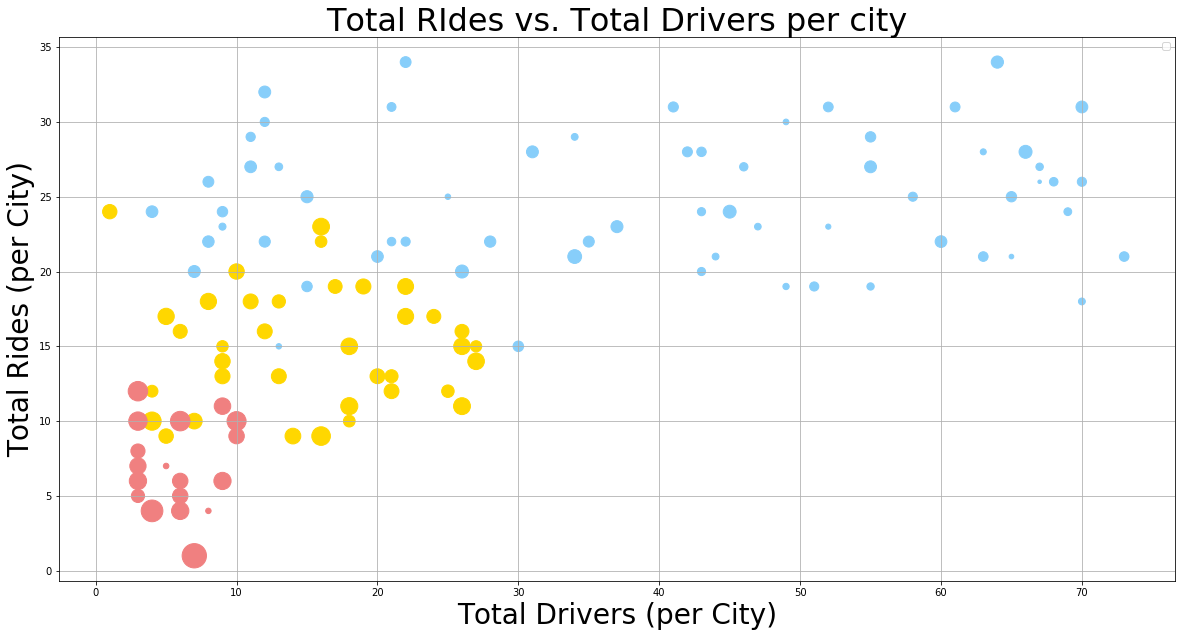

In [105]:
#create  bubble chart
#set colors for 'type' values
colors = {'Urban' : 'lightskyblue',
          'Suburban' : 'gold',
          'Rural' : 'lightcoral'}
c = [colors[val] for val in clean_pyber['type']]

#create scatter plot
pyber_bubble = clean_pyber.plot(kind="scatter", x="Total Drivers", y="Total Rides", grid=True, figsize=(20,10), title="Total RIdes vs. Total Drivers per city", sizes=(clean_pyber['Average Fare']-20)*20, colors=c)

#set labels & title
pyber_bubble.set_xlabel("Total Drivers (per City)", fontsize=28)
pyber_bubble.set_ylabel("Total Rides (per City)", fontsize=28)
pyber_bubble.set_title(pyber_bubble.title.get_text(), fontsize=32)
#set legend
pyber_bubble.legend(["Total Drivers"], c)

plt.show()

In [70]:
#group by type
clean_pyber_groupby = clean_pyber.groupby('type').sum()

clean_pyber_groupby.head()

,Total Rides,Total Drivers,Average Fare,ride_id,driver_count
type,,,,,
Rural,125,104,615.728572,9.591028e+13,104
Suburban,593,620,1236.820828,1.930277e+14,620
Urban,1625,2607,1623.863390,3.203337e+14,2607


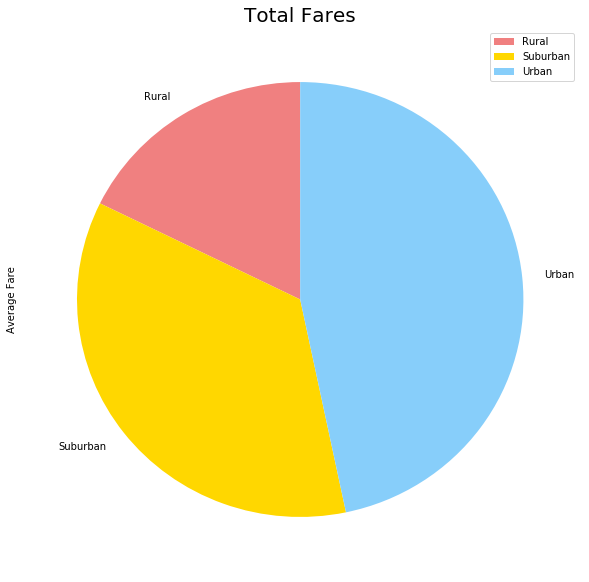

In [107]:
#Pie Chart % of Total Fares by City Type

#labels = clean_pyber_groupby['type']
#fare = clean_pyber_groupby['Average Fare']
c = ['lightcoral', 'gold', 'lightskyblue']
pyber_Total_Fares = clean_pyber_groupby.plot(kind='pie',y ='Average Fare', figsize=(10,10), startangle=90, colors=c)
pyber_Total_Fares.set_title('Total Fares', fontsize=20)
plt.show()


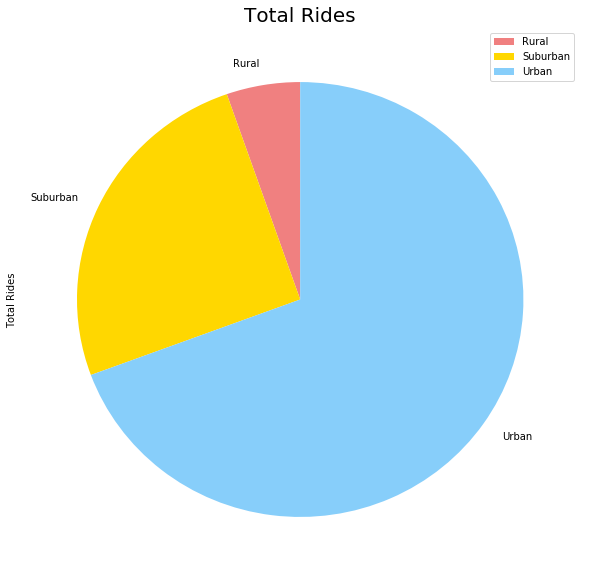

In [108]:
#Pie Chart % of Total Rides by City Type
c = ['lightcoral', 'gold', 'lightskyblue']
pyber_Total_Rides = clean_pyber_groupby.plot(kind='pie',y ='Total Rides', figsize=(10,10), startangle=90, colors=c)
pyber_Total_Rides.set_title('Total Rides', fontsize=20)
plt.show()


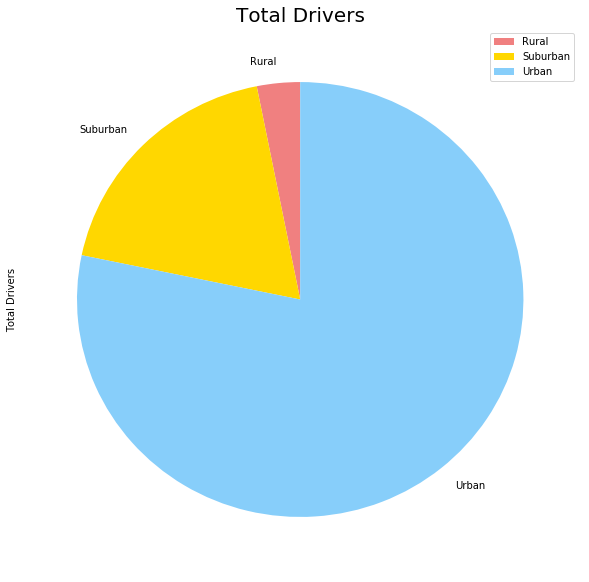

In [109]:
#Pie Chart % of Total Drivers by City Type
c = ['lightcoral', 'gold', 'lightskyblue']
pyber_Total_Drivers = clean_pyber_groupby.plot(kind='pie',y ='Total Drivers', figsize=(10,10), startangle=90, colors=c)
pyber_Total_Drivers.set_title('Total Drivers', fontsize=20)
plt.show()
